In [ ]:
# -----Read in .wav file
# Per the documentation, scipy.io.wavfile.read(somefile) returns a tuple of two items: the first is the sampling rate in samples per second, the second is a numpy array with all the data read from the file:

import matplotlib
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import glob
import sys
import os
from pydub import AudioSegment

import numpy as np

samplerate, data = wavfile.read('./vader.wav')
samplerate1, playeddata = wavfile.read('./forceisstrong.wav')
# audio segments

vader = AudioSegment.from_wav("./vader.wav")
swsong = AudioSegment.from_wav("./forceisstrong.wav")

samples = vader.get_array_of_samples()
samples1 = swsong.get_array_of_samples()

FFTsmaples = np.fft.fft(samples)
shifted = np.fft.fftshift(transformed)
fft_out = fft(vader)
fft_out2 = fft(shifted)
plt.plot(data, np.abs(vader))
plt.show()

#use samples n samples1 in 1st trial
'''
ly = AudioSegment.from_wav("vader.wav")

samples = ly.get_array_of_samples()
print(samples[1000:5000])

# Advanced usage, if you have raw audio data:
sound = AudioSegment(
    # raw audio data (bytes)
    data=b'…',

    # 2 byte (16 bit) samples
    sample_width=2,

    # 44.1 kHz frame rate
    frame_rate=44100,

    # stereo
    channels=2
)

# superposed audio
combined = swsong.overlay(vader)




class Frame():
    def __init__(self, buff_size):
        frame = [buff_size]


# -----Add to buffer
bufferSize = 1000
# frame buffer = frames.get(bufferSize)
# for each binary bit
# if binary bit == 1
# then addHighPowerHFT into frame buffer
# if binary bit == 0r
# then noHFTInjection into frame buffer

# frames = Read WaveFile(fileName)
# characters = Read Character Data()
# binary bits = Convert(Characters)
# foreach bit in binary bits
# add HFT(bit)
# output file = Write WaveFile


# ---------For each HF bit[1], add it to frame buffer
# frames = Read WaveFile(stegoFileName)
# fftData = FFT(frames)
# data = HighPass(fftData
# foreach buffer in data
# bits += get Bit(buffer)
# characters = Convert(bits)


# ----------Decode the encoded file
# Reversing the shift:
#print(np.all((np.fft.ifftshift(shifted) - transformed) < 10 ** -9))'''


44100


"""ALgos:
1. Connvert both to fft
2. shift other by 20Khz
3. Add the two in frequency .
4. Return back to audio and write out.
consider sample rates
"""

In [ ]:
def main():
    import matplotlib.pyplot as plt
    from scipy.io import wavfile as wav
    from scipy.fftpack import rfft, irfft
    import numpy as np
    #rate, data = wav.read('./forceisstrong.wav')
    rate, data = wav.read('./swthemesong.wav') #2CH L,R
    rate1, data1 = wav.read('./vader.wav') #1CH
    #cant process whole file - buffer issues
    fft_out = rfft(data[:,0][:20000])
    
    fft_out1 = rfft(data1, n=20000)
    
    final = np.add(fft_out, fft_out1) # or just +

    output = irfft(final).astype(int)
    
    testout = irfft(fft_out1)
    
    print(f"Final: {final}{final.shape}")
    print(f"Data: {data}{data.shape}")
    print(f"Output: {output}{output.shape}")
    
    print(fft_out.shape)
    
    for d in data[:,0][:2000]:
        print(d)
        
    for d in output[:2000]:
        print(d)
        
    
    
    #print("MAX:", np.amax(fft_out1))
    
    
    plt.plot(final[:20000], np.abs(final))
    plt.show()
    print(rate,data[:,1]) #right channel can add data to left channel tooo?
    print(data.shape, rate1, rate)
    wav.write(filename="./out.wav", rate=rate, data=testout)#data[:,1])
main()


In [ ]:
'''Attempt 3 workin - resize after fft'''

def main():
    import matplotlib.pyplot as plt
    from scipy.io import wavfile as wav
    from scipy.fftpack import rfft, irfft, fft, ifft, fftfreq
    import numpy as np
    #rate, data = wav.read('./forceisstrong.wav')
    rate, data = wav.read('./swthemesong.wav') #2CH L,R
    data = data.T[0]
    rate1, data1 = wav.read('./vader.wav') #1CH
    #cant process whole file - buffer issues
    
    #rfft losing out some energy with complex elements.
    fft_out = rfft(data) #[:20000] parallelize?
    fft_out1 = rfft(data1)
    
    #[3,7,4,8,2,9,2,8,0,3]
    
    r0 = fft(data) #[:20000] parallelize?
    r1 = fft(data1)
    r1.resize(r0.shape) 
    r2 = np.abs(r0+r1)
    
    
    #summed = fft_out + fft_out1
    
    ifft_out = irfft(fft_out).flatten().astype(data.dtype)
    ifft_out1 = irfft(fft_out1).flatten().astype(data1.dtype)
    
    #b is higher dimension, then:
    #a.resize(b.shape)
    #c = a+b
    #chack which size is larger. - carrier gotta b larger.
    
    ifft_out1.resize(ifft_out.shape)    
    final = ifft_out + ifft_out1 #np.add(fft_out, fft_out1) # or just +
    sub = final - ifft_out
    sub = np.trim_zeros(sub, trim='b')
    print(sub)

    #output = irfft(final).astype(int)
    #testout = irfft(fft_out1)        
    
    final = ifft_out + ifft_out1 #np.add(fft_out, fft_out1) # or just +
    sub = final - ifft_out
    #sub = np.trim_zeros(sub, trim='b')
    print(sub)
    #sub = sub[:data1.shape[0]]
    plot1 = plt.figure(1)
    plt.plot([i for i in range(len(data1))], data1)
    plot1 = plt.figure(2)
    plt.plot([i for i in range(len(data))], data)
    
    plot1 = plt.figure(3)
    plt.plot([i for i in range(len(final[:40000]))], final[:40000])
    
    plot1 = plt.figure(4)
    plt.plot([i for i in range(len(ifft_out1[:40000]))], ifft_out1[:40000])
    
    plot1 = plt.figure(5)
    plt.plot([i for i in range(len(sub[:40000]))], sub[:40000]*20)
    
    plot1 = plt.figure(6)
    plt.plot(fftfreq(r1.shape[0]), r1)
    #plt.plot(sub, np.abs(sub))
    plt.show()
    print(rate,data) #right channel can add data to left channel tooo?
    print(data.shape, rate1, rate)
    #wav.write(filename="./ifft1.wav", rate=rate, data=final)#data[:,1])
    #wav.write(filename="./sub1.wav", rate=rate1, data=sub)#data[:,1])
    
    #wav.write(filename="./ifft.wav", rate=rate, data=final)#data[:,1])
    #wav.write(filename="./wildsub.wav", rate=rate1, data=ifft_out1)#data[:,1])
    #wav.write(filename="./ifftOG.wav", rate=rate1, data=ifft_out1[:50000])#data[:,1])
    #wav.write(filename="./ifftSUB.wav", rate=rate1, data=sub[:50000]*60)#data[:,1]) #multipli to increase amplitude and add volume
main()


In [ ]:
import numpy as np
from scipy.io.wavfile import write
#import sounddevice as sd
import time

# Samples per second
sps = 44100

# Duration
duration_s = 5.0

# ac: amplitude of the carrier. Should be kept at 1.0 in this script
# you would modify it if you were micing it with, or modulating other,
# waveforms.

# carrier_hz: Frequency of the carrier
# fm_hz: Frequency of the frequency modulator
# k_p: deviation constant
carrier_amplitude = 1.0
carrier_hz = 21000#440.0 #carrier.
fm_hz = 220.0 #data signal freq
k = 25.0

# Our final waveform is going to be calculated as the cosine of carrier and
# frequency modulated terms.

# First, define our range of sample numbers
each_sample_number = np.arange(duration_s * sps)

# Create the term that create the carrier
carrier = 2 * np.pi * each_sample_number * carrier_hz / sps

# Now create the term that is the frequency modulator
modulator = k * np.sin(2 * np.pi * each_sample_number * fm_hz / sps)

# Now create the modulated waveform, and attenuate it
waveform = np.cos(carrier + modulator)
waveform_quiet = waveform * 0.3

# Adjust amplitude of waveform and write the .wav file.
waveform_integers = np.int16(waveform_quiet * 32767 *0.1)
write('fm-out.wav', sps, waveform_integers)

# Play the waveform out the speakers
#sd.play(waveform_quiet, sps)
#time.sleep(duration_s)
#sd.stop()

In [60]:
'''
def modulate(data, sample_rate=44100):

    # Duration
    #duration_s = 5.0 #******
    
    #from scipy.io import wavfile
    #Fs, data = wav.read('filename.wav')
    #n = data.size
    #t = n / Fs

    # ac: amplitude of the carrier. Should be kept at 1.0 in this script
    # you would modify it if you were micing it with, or modulating other,
    # waveforms.

    # carrier_hz: Frequency of the carrier
    # fm_hz: Frequency of the frequency modulator
    # k_p: deviation constant
    carrier_hz = 21000#440.0 #carrier.
    fm_hz = 220.0 #data signal freq #********** incoming rate
    k = 25.0

    # Our final waveform is going to be calculated as the cosine of carrier and
    # frequency modulated terms.

    # First, define our range of sample numbers
    each_sample_number = np.arange(data.shape[0]) #**********

    # Create the term that create the carrier
    carrier = 2 * np.pi * each_sample_number * carrier_hz / sample_rate

    # Now create the term that is the frequency modulator
    modulator = data#k * np.sin(2 * np.pi * each_sample_number * fm_hz / sample_rate)

    # Now create the modulated waveform, and attenuate it
    waveform = np.cos(carrier + modulator) #fix bug TODO
    waveform_quiet = waveform * 0.3

    # Adjust amplitude of waveform and write the .wav file.
    waveform_integers = np.int16(waveform_quiet * 32767 *0.01) #***************
    #write('fm-out.wav', sps, waveform_integers)
    return waveform_integers
    
    '''

def modulate(data, sample_rate):
    
    modulator_frequency = sample_rate
    carrier_frequency = 21000.0
    modulation_index = 1.0

    time = np.arange(sample_rate) / sample_rate
    modulator = data #np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
    carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
    product = np.zeros_like(modulator)

    for i, t in enumerate(time):
        product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))
        
    return product
    

In [63]:
'''Attempt 3 workin - resize after fft'''

def main():
    import matplotlib.pyplot as plt
    from scipy.io import wavfile as wav
    from scipy.fftpack import rfft, irfft, fft, ifft, fftfreq
    import numpy as np
    #rate, data = wav.read('./forceisstrong.wav')
    rate, data = wav.read('./swthemesong.wav') #2CH L,R
    data = data.T[0]
    rate1, data1 = wav.read('./vader.wav') #1CH
    #cant process whole file - buffer issues
    '''
    #rfft losing out some energy with complex elements.
    fft_out = rfft(data) #[:20000] parallelize?
    fft_out1 = rfft(data1)    
    
    ifft_out = irfft(fft_out).flatten().astype(data.dtype)
    ifft_out1 = irfft(fft_out1).flatten().astype(data1.dtype)
    
    #b is higher dimension, then:
    #a.resize(b.shape)
    #c = a+b
    #chack which size is larger. - carrier gotta b larger.
    
    ifft_out1.resize(ifft_out.shape)  
    
    
    
    final = ifft_out + ifft_out1 #np.add(fft_out, fft_out1) # or just +
    sub = final - ifft_out
    sub = np.trim_zeros(sub, trim='b')
    

    #output = irfft(final).astype(int)
    #testout = irfft(fft_out1)        
    
    final = ifft_out + ifft_out1 #np.add(fft_out, fft_out1) # or just +
    '''
    #data1.resize(data.shape)
    modulated_d1 = modulate(data1, rate1)
    modulated_d1.resize(data.shape)
    final = data + modulated_d1
    #wav.write(filename="./mod1test.wav", rate=rate, data=final)#data[:,1])
    #wav.write(filename="./modedVadertest.wav", rate=rate, data=modulated_d1)#data[:,1])
    return final, rate1
    
    
final, sample = main()


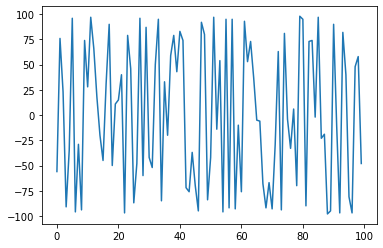

################ 22050


In [52]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile as wav
import numpy as np
from scipy.fftpack import rfft, irfft, fft, ifft, fftfreq

def HPF(data, rate):
    #t = np.linspace(0, 1, 1000, False)  # 1 second
    t = np.arange(data.size)
    #sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
    sig=data
    
    
    plot1 = plt.figure(1)
    plt.plot([i for i in range(data[2000:2100].size)], data[2000:2100])
     
    
#     fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
#     ax1.plot(t, sig)
#     ax1.set_title('ModulatedSecretSignal + OGAudio <20kHz + >20kHz')
#     ax1.axis([0, 1, -2, 2])
#     print(sig)

    #Design a digital high-pass filter at 15 Hz to remove the 10 Hz tone, and apply it to the signal. (It’s recommended to use second-order sections format when filtering, to avoid numerical error with transfer function (ba) format):

    sos = signal.butter(10, 11020, 'hp', fs=rate, output='sos')
    filtered = signal.sosfilt(sos, sig)
#     r0 = rfft(data)
#     r1 = rfft(filtered)
#     print(r0)
#     print(r0.shape)
#     plot3 = plt.figure(3)
#     plt.plot(fftfreq(r0.shape[0]), r0)
    
#     plot4 = plt.figure(4)
#     plt.plot(fftfreq(r1.shape[0]), r1)
    
#     ax2.plot(t, filtered)
#     ax2.set_title('After 15 Hz high-pass filter')
#     ax2.axis([0, 1, -2, 2])
#     ax2.set_xlabel('Time [seconds]')
#     plt.tight_layout()
    plt.show()
    return filtered.astype(data.dtype)
    
filtered = HPF(final,sample)
#wav.write(filename="./filtered.wav", rate=sample, data=filtered)


def demodulate(data, sample_rate=44100):

    # Duration
    #duration_s = 5.0 #******
    
    #Fs, data = wav.read('filename.wav')
    #n = data.size
    #t = n / Fs

    # carrier_hz: Frequency of the carrier
    # fm_hz: Frequency of the frequency modulator
    # k_p: deviation constant
    carrier_hz = 21000#440.0 #carrier.
    fm_hz = 220.0 #data signal freq #********** incoming rate
    k = 25.0

    # Our final waveform is going to be calculated as the cosine of carrier and
    # frequency modulated terms.

    # First, define our range of sample numbers
    each_sample_number = np.arange(data.shape[0]) #**********

    # Create the term that create the carrier
    carrier = 2 * np.pi * each_sample_number * carrier_hz / sample_rate

    # Now create the term that is the frequency modulator
    demodulator = data#k * np.sin(2 * np.pi * each_sample_number * fm_hz / sample_rate)

    # Now create the modulated waveform, and attenuate it
    waveform = np.cos(demodulator - carrier)
    waveform_quiet = waveform * 0.3

    # Adjust amplitude of waveform and write the .wav file.
    waveform_integers = np.int16(waveform_quiet * 32767 *20) #***************
    #write('fm-out.wav', sps, waveform_integers)
    return waveform_integers

demod = demodulate(filtered,sample)
wav.write('demod-out1.wav', sample, demod)
print("################",sample)

#vader  22050
#swthemesong 44100


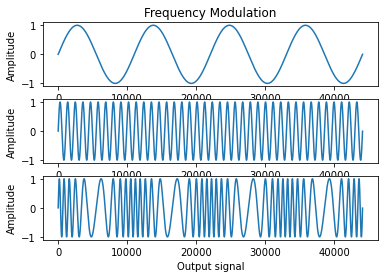

array([0. , 0.2, 0.4, 0.6, 0.8])

In [55]:
import numpy as np
import matplotlib.pyplot as plt

modulator_frequency = 4.0
carrier_frequency = 40.0
modulation_index = 1.0

time = np.arange(44100.0) / 44100.0
modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
product = np.zeros_like(modulator)

for i, t in enumerate(time):
    product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))

plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()

